# Einführung & Grundlagen Machine Learning (ML)  

    18. & 19. März 2020, München    
    Autor: Andreas Barth, barth@strategiepilot
***

Willkommen in IHREM persönlichen Jupyter-Notebook.   
Sie können in diesem Notebook alle Beispiele live nachvollziehen, aber auch eigene Varianten ausprobieren.

Hier noch einige sehr hilfreiche Tastatur-Kürzel für effizientes Arbeiten:

* **Ausführen/Run** einer Zelle mit ... [SHIFT+ENTER]
* Eine neue leere Zelle **über** einer Zelle einfügen mit ... [a] 
* Eine neue leere Zelle **unter** einer Zelle einfügen mit ... [b]
* Eine Zelle **löschen/entfernen** !!VORSICHT!! mit ... [dd]
* Eine Zelle in **Markdown-Format** umwandeln mit ... [m]
* Eine Zelle in **Coding-Format** umwandeln mit ... [y]

Diesen Code müssen wir am Anfang IMMER ausführen:

In [1]:
%matplotlib inline

# Grundausstattung an Bibliotheken, die wir immer laden
import numpy as np                  # Numerische Operationen, Lineare Algebra
from scipy.stats import *           # Funktionsbibliothek mit statistischen Funktionen
import matplotlib.pyplot as plt     # Funktionsbilio<thek zur Visualisierung von Daten/Ergebnissen
import pandas as pd                 # Bearbeitung von tabellarischen Daten (sog. Data Frames)
import seaborn as sns               # Erweiterte Visualisierung von Daten/Ergebnissen etc.
import warnings                     # Ermöglicht die Deaktivierung von best. Warnmeldungen
import random                       # Damit kann man Zufallszahlen generieren
import os                           # Ermöglicht Zugriff auf das Dateiablagesystem 
import datetime as dt               # Funktionsbiliothek zum Arbeiten mit Zeitreihen Daten
import pickle                       # Ermöglicht das Abspeichern von Objekten (z.B. trainierten Modellen)

# Ein paar Einstellungen, die einem das Leben einfacher machen
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [8, 4]
from IPython.core.pylabtools import figsize
plt.style.use('seaborn-white')
sns.set_style('white')
sns.set_context('talk')

os.chdir("F://Data/Data Science Uni/40200/BMW Bank Seminar/Data Sets")

***
#  Inhalt

2. Daten & Preprocessing
   - Daten laden u. explorieren
   - Einfaches Preprocessing


3. Unsupervised Learning
   - Clustering mit Kmeans


4. Supervised Learning: Lineare Modelle
   - Datenset: BMW Pricing Challenge
   - Lineare Regression


5. Supervised Learning: Classification
   - Datenset: "Give me some Credit"
   - Ein erstes Modell: Decision Tree
   - Modellauswahl & -beurteilung verschiedener Modelle 


6. Exkurs: NLP Natural Language Processing & Text Mining

***
## 2. Daten & Preprocessing

### 2.1 Daten laden & explorieren
Zunächst schauen wir uns an, wie man Daten in Python gut einlesen, explorieren und für ML vorbereiten kann.  
Wenn man mit tabellarischen Daten arbeiten möchte bietet sich insbesondere die Funktionsbibliothek PANDAS an.  
Da wir sie bereits standardmässig (s.o. bei imports) aufgerufen haben, steht sie uns sofort zur Verfügung.

Wir laden ein Datenset mit 261 PKW Modellen, die mit jeweils 8 Merkmalen beschrieben werden.  
Im Urzustand sind die Daten so noch nicht in dem Format, dass wir für ML brauchen.  
Darum kümmern wir uns jetzt ...

In [7]:
cars = pd.read_csv("cars.csv", sep=",", decimal=".")     # Einlesen der.csv Datei vom Verzeichnis und in den Dataframe "cars" schreiben
cars.head()                                              # .head()  zeigt die ersten 5 Datensätze/Zeilen des Dataframes an 

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,country
0,14.0,8,350.0,165,4209.0,12,1972,US
1,31.9,4,89.0,71,1925.0,14,1980,Europe
2,17.0,8,302.0,140,3449.0,11,1971,US
3,15.0,8,400.0,150,3761.0,10,1971,US
4,30.5,4,98.0,63,2051.0,17,1978,US


Umfang unseres df bestimmen:  Anzahl Datensätze (Zeilen), Anzahl Features (Spalten)

In [8]:
cars.shape

(261, 8)

Anzeigen der Mermale / Features / Spalten, ihrer Datentypen und Anzahl von fehlenden Werten

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
mpg            261 non-null float64
cylinders      261 non-null int64
cubicinches    259 non-null float64
hp             261 non-null int64
weightlbs      258 non-null float64
time-to-60     261 non-null int64
year           261 non-null int64
country        257 non-null object
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


Mittelwerte aller Merkmale ermitteln mit .mean()  
Das funktioniert aber auch mit ...    
.median()  
.std()  
.var()  
.min()  
.max()  

In [10]:
cars.mean()

mpg              23.144828
cylinders         5.590038
cubicinches     200.918919
hp              106.360153
weightlbs      3009.833333
time-to-60       15.547893
year           1976.819923
dtype: float64

Oder wenn man nur die Werte eines bestimmten Merkmals ermitteln möchte:

In [11]:
cars.cubicinches.mean()

200.9189189189189

Noch einfacher ... eine komplette Beschreibung der Verteilungsparameter aller numerischen Merkmale unseres Datensets

In [13]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,261.0,23.144828,7.823570,10.0,16.9,22.0,28.8,46.6
cylinders,261.0,5.590038,1.733310,3.0,4.0,6.0,8.0,8.0
cubicinches,259.0,200.918919,109.258305,68.0,99.5,156.0,303.0,455.0
hp,261.0,106.360153,40.499959,46.0,75.0,95.0,138.0,230.0
weightlbs,258.0,3009.833333,854.039019,1613.0,2248.0,2867.5,3670.0,4997.0
time-to-60,261.0,15.547893,2.910625,8.0,14.0,16.0,17.0,25.0
year,261.0,1976.819923,3.637696,1971.0,1974.0,1977.0,1980.0,1983.0


Visuelle Exploration der Daten geht auch:

(a) Histogramm

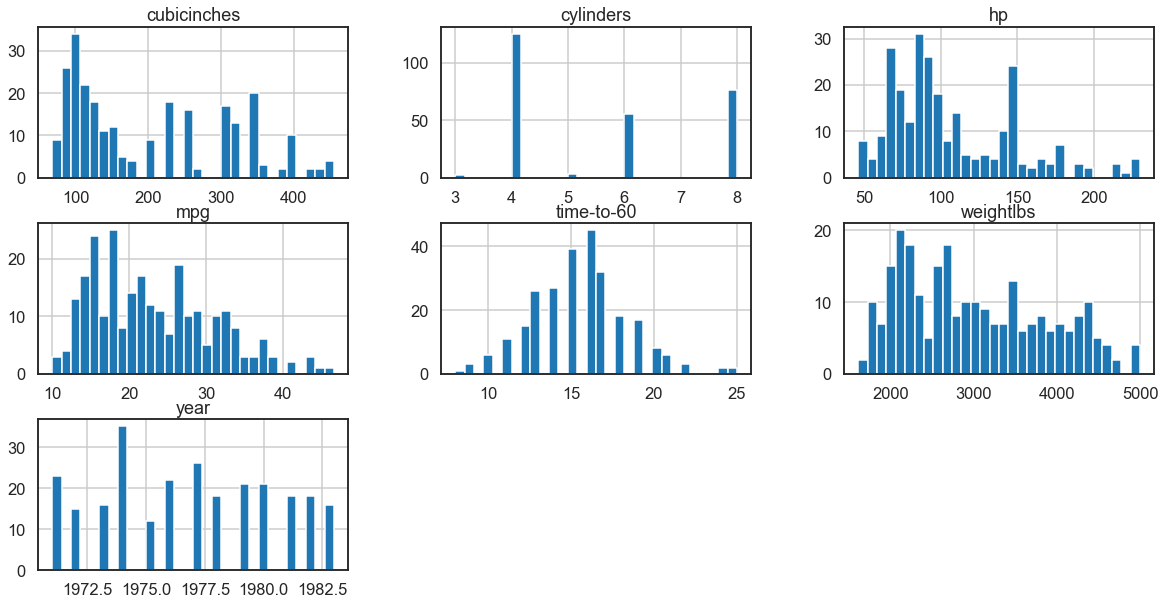

In [17]:
figsize(20,10)             # stellt die Größe der Abbildung ein (Horizontale, Vertikale)
_= cars.hist(bins=30,)     # erzeugt ein Histogramm mit 30er Intervallschritten, einstellbar über bins=xx

(b) Countplot

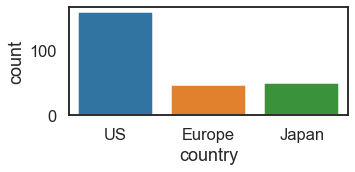

In [20]:
# Visualidierung Anzahl Modelle nach "Country"
figsize(5,2)  
_= sns.countplot(x=cars.country, data=cars, )

(c) Boxplot

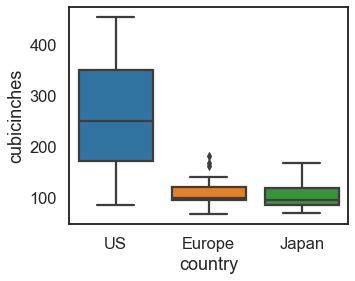

In [21]:
# Visualidierung Boxplot: Verteilung der Kubikinches nach "Country"
figsize(5,4)  
_= sns.boxplot(x=cars.country, y=cars.cubicinches, data=cars)

(d) Violinplot

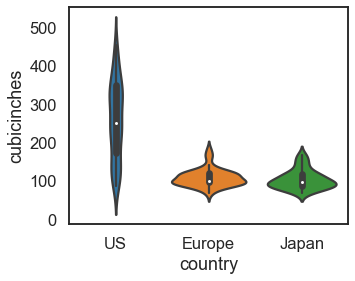

In [22]:
# Visualidierung Violinplot: Verteilung der Kubikinches nach "Country"
figsize(5,4)  
_= sns.violinplot(x=cars.country, y=cars.cubicinches, data=cars)

(e) Etwas advancend: Paarweise Verteilung ausgewählter Feature

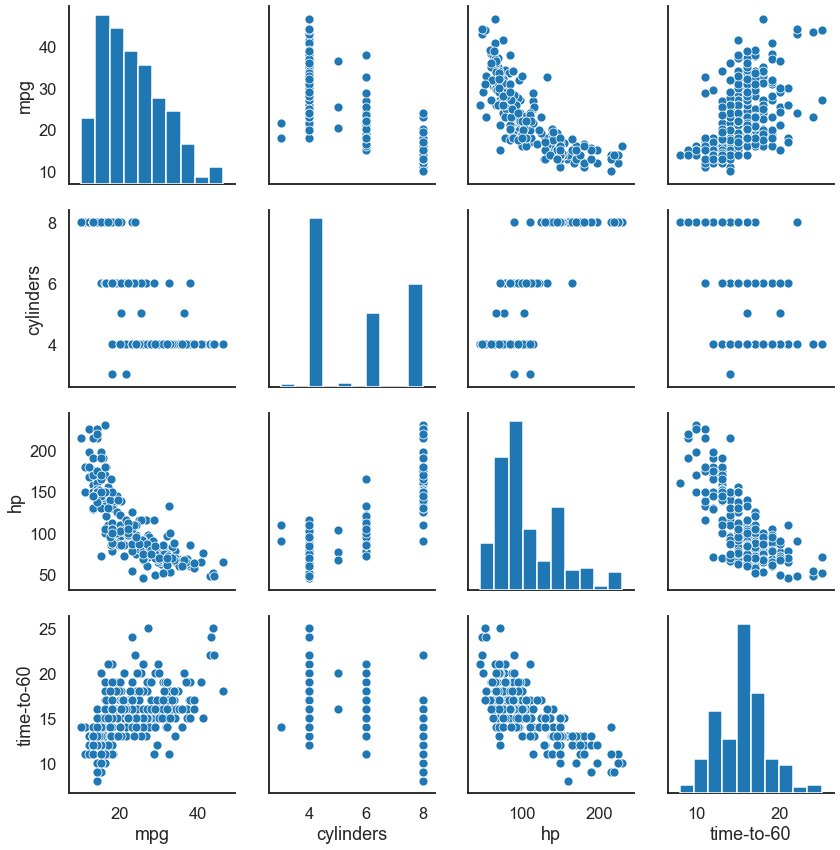

In [33]:
figsize(20,20)
_= sns.pairplot(data=cars, vars=["mpg","cylinders","hp","time-to-60"], size=3)  # hue=cars.country

### 2.2 Wichtige Preprocessing Schritte
Leider sind Rohdaten in der Realität selten (oder nie) in einem für ML Algorithmen geigneten Zustand,  
so dass ein PreProcessing und Vorbereiten der Daten erforderlich ist.
Die gängigsten Arbeitsschritte sind ...

+ Fehlende Werte ersetzen oder bereinigen
+ Kategorielle Daten encoden (umwandeln)
+ Numerische Merkmale standardisieren / skalieren


#### *Fehlende Werte*
... heißen in Python meistens "NA" (oder nan). Viele ML Algorithmen funktioneren nicht mit NA Werten im Datenset.  
Welche Strategien kann man anwenden?  
+ Löschen von einzelnen Datensätzen mit NA Werten
+ Löschen von einzelnen Merkmalen (Feature) mit NA Werten
+ NA Werte durch Schätzwerte ersetzen => Mittelwert, Median, Modus, Max-Wert, Min-Wert, individueller Wert, Regressionsmodell lernen

Wie sieht es in unserem Datenset aus?  
Welche Merkmale haben NA und wieviele davon?

In [39]:
cars.isna().sum()
# oder prozentual:  
# cars.isna().mean()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
country        4
dtype: int64

Da uns prozentual nur wenige Werte fehlen, können wir sie bedenkenlos mit dem jeweiligen Mittelwert oder Median des Merkmals ersetzen

In [38]:
cars = cars.fillna(cars.mean())   # alternativ mit .median()

Sind jetzt alle fehlenden Werte ersetzt worden?

In [40]:
# OK, dann kümmern wir uns noch um das nicht-numerische Merkaml "country"
cars.country = cars.country.fillna("MISSING")

Verteilung des Merkmals "country"

In [42]:
cars.country.value_counts()

US         160
Japan       50
Europe      47
MISSING      4
Name: country, dtype: int64

#### *Kategorielle alphanumerische Daten umwandeln*
Sehr viele ML Algorithmen (fast alle in der Bibliothek Scikit-Learn) können nur numerische Daten verarbeiten.  
In der Praxis sind kategorielle Merkmale aber häufig alphanumerisch: Farbe, Geschlecht, Hersteller, Modell, Land ...  
Wenn man diese Merkmale als Feature nutzen möchte, muss man sie in eine numerische Form encoden:
  
Zwei gängige Methoden dafür sind "Label Encoding" und "One Hot Encoding".  

OH Encoding hat ggü. Label Encoding einen entscheidenden Vorteil:  
Label Encoding stellt eine (häufig nicht real existierende) Logik bzw. Rangfolge zwischen den Merkmalen her:  
Label Encoding unseres Merkmals Country führt zu: (0, US), (1, Europe), (2, Japan). Ist Japan > Europe > US ??    
Beim OH Encoding hingegen werden die Merkmale transformiert, ohne dass eine ungewollte Rangfolge der Ausprägungen ensteht.

Wir transformieren also unser Feature "colour" mit dem OH-Encoder:

In [43]:
cars_target = cars.country.copy()          # Brauchen wir später noch ...

# Jetzt transformieren wir cars mit "One Hot Encoding"
cars = pd.get_dummies(cars, )
cars.sample(4)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,country_Europe,country_Japan,country_MISSING,country_US
185,20.8,6,200.0,85,3070.0,17,1979,0,0,0,1
107,30.0,4,88.0,76,2065.0,15,1972,1,0,0,0
137,13.0,8,302.0,129,3169.0,12,1976,0,0,0,1
152,14.0,8,455.0,225,4425.0,10,1971,0,0,0,1


#### *Daten normalisieren/standardisieren*
Sehr viele Algorithmen nutzen mathematische Distanzmaße wie z.B. den Abstand eines Datenpunktes vom Mittelwert.  
Wenn die einzelnen Feature in ihren Ausprägungen unterschiedlich stark skalieren (z.B. Anzahl Zylinder und PS)  
dann "verzerren" diese unterschiedlichen Skalen die Ergebnisse des Algorithmus.

Lösungsstrategie: Einheitliche Skalierung der Daten, d.h. man standardisiert sie.  
Schauen wir uns die statistischen Eckwerte (Lageparameter) unserer numerischen Feature an:

In [44]:
feat_num = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60']   # Liste feat_num := Vereinfacht die Adressierung
cars.loc[:, feat_num].describe()[1:3]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625


Wir standardisieren unsere Daten mit der sog. Z-Score Methode (Normalisierung)  
Die Funktionsbibliothek Scikit-Learn (ML Methoden) bietet dafür eine geeignete Methode an.

In [45]:
from sklearn.preprocessing import StandardScaler    # importieren des Tools aus scikit-learn

X = cars.copy()                        # jetzt wandeln wir unseren Dataframe in eine Datenmatrix X um
X = X[feat_num]                        # wir skalieren nur die ersten 6 Feature (nicht das Jahr und die Länder)

scaler = StandardScaler().fit(X)       # Trainiert den Scaler auf die Datenmatrix
X = scaler.transform(X)                # Transformiert Datenmatrix X

print(cars.loc[:0,feat_num])           # Ausgabe der ersten Zeile des Cars Datensets
print(X[:1])                           # Ausgabe der ersten Zeile der transformierten Matrix X
print(80*"-")
for i in X[:5]: print("\n",i)          # Pretty Printing der ersten 5 transformierten Datensätze


    mpg  cylinders  cubicinches   hp  weightlbs  time-to-60
0  14.0          8        350.0  165     4209.0          12
[[-1.17112732  1.39305285  1.37239295  1.45068065  1.41499703 -1.22128734]]
--------------------------------------------------------------------------------

 [-1.17112732  1.39305285  1.37239295  1.45068065  1.41499703 -1.22128734]

 [ 1.12122635 -0.91910482 -1.03028992 -0.87476849 -1.28008557 -0.53282946]

 [-0.78693397  1.39305285  0.93052024  0.83221013  0.51820947 -1.56551627]

 [-1.04306287  1.39305285  1.83267702  1.07959834  0.88636436 -1.90974521]

 [ 0.94193612 -0.91910482 -0.94743878 -1.07267905 -1.13140763  0.49985734]


***
Nach der Exploration und Vorbereitung unserer Daten wenden wir uns jetzt dem ML zu:

## 3. Unsupervised Learning: Clustering mit k-Means
Wir arbeiten mit unseren cars Daten weiter. Beim **"unsupervised" Learning"** wird ein Modell **ohne ein vorhandenes Label (Lernsignal)** trainiert.  
D.h. in unserem Beispiel, dass wir simulieren die Informtion der Herkunft "country" nicht zu besitzen.  
Dafür erstellen wir eine Datenmatrix X des cars-Datenset OHNE das Feature "country".  
Wir versuchen das Herkunftsland (Region) über k-Means zu bestimmen:

In [55]:
X = cars[feat_num].copy()  # Datenmatrix X mit unseren Features
X.sample(3)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60
255,24.0,4,113.0,95,2372.0,15
10,34.0,4,108.0,70,2245.0,17
162,18.0,6,171.0,97,2984.0,15


Jetzt wenden wir den K-Means Algorithmus an, um die Daten zu clustern.  
Bei K-Means muss man die Anzahl der "vermuteten" Cluster dem Algorithmus vorgeben:

In [87]:
X = cars[feat_num].copy()                  # Datenmatrix X mit unseren Features
from sklearn.cluster import KMeans         # Import des Algorithmus
# X = StandardScaler().fit_transform(X)    # Standardisiert die Datenmatrix - lassen wir erstmal weg
km = KMeans(n_clusters=3).fit(X)           # Wendet k-Means auf X an, mit Vorgabe 3 Cluster

Mal sehen wie gut k-Means auf unserem Datenset funktioniert.  
In realita würden wir natürlich die "richtige" Verteilung nicht kennen ...

In [88]:
print("Gruppierung durch k-Means Algo:\n", pd.Series(km.labels_).value_counts())
print()
print("Reale Verteilung im Datenset\n", cars_target.value_counts())
# km.labels_  

Gruppierung durch k-Means Algo:
 0    118
2     81
1     62
dtype: int64

Reale Verteilung im Datenset
 US         160
Japan       50
Europe      47
MISSING      4
Name: country, dtype: int64


Wir visualisieren die k-Means Ergebnisse zum besseren Verständnis.  
Diese Merkmale stehen uns zur Verfügung:

In [89]:
list(enumerate(cars[feat_num].columns))

[(0, 'mpg'),
 (1, 'cylinders'),
 (2, 'cubicinches'),
 (3, 'hp'),
 (4, 'weightlbs'),
 (5, 'time-to-60')]

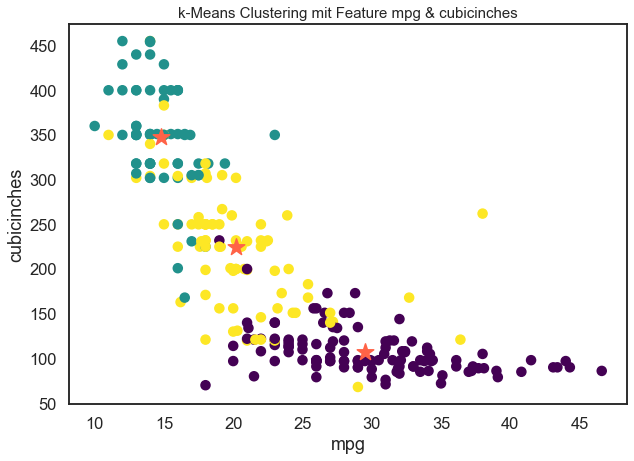

In [90]:
# Visualisierung der Zuordnungen
figsize(10,7)

# Hier können wir die Merkmale für das Plotting auswählen
x,y = 0,2         # x = Merkmal X-Achse, y = Merkmal Y-Achse 

plt.scatter(X.iloc[:,x], X.iloc[:,y], c=km.labels_,  cmap="viridis")
plt.scatter(km.cluster_centers_[:,x], km.cluster_centers_[:,y], c='tomato', marker='*', s=300, ) # Scatterplot mit Centroids
plt.title(f"k-Means Clustering mit Feature {cars.columns[x]} & {cars.columns[y]}", fontsize=15)
plt.xlabel(cars.columns[x]); plt.ylabel(cars.columns[y]); plt.show()

In [81]:
cars[cars.mpg>35].sort_values("mpg", ascending=False)[:10]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,country_Europe,country_Japan,country_MISSING,country_US
63,46.6,4,86.0,65,2110.0,18,1981,0,1,0,0
247,44.3,4,90.0,48,2085.0,22,1981,1,0,0,0
235,44.0,4,97.0,52,2130.0,25,1983,1,0,0,0
106,43.4,4,90.0,48,2335.0,24,1981,1,0,0,0
197,43.1,4,90.0,48,1985.0,22,1979,1,0,0,0
195,41.5,4,98.0,76,2144.0,15,1981,1,0,0,0
206,40.8,4,85.0,65,2110.0,19,1981,0,1,0,0
212,39.1,4,79.0,58,1755.0,17,1982,0,1,0,0
238,39.0,4,86.0,64,1875.0,16,1982,0,0,0,1
24,38.1,4,89.0,60,1968.0,19,1981,0,1,0,0


Wenn wir mit der Qualität unseres Modells zufrieden wären (ohne Kenntnis der Echtdaten schwierig!).  
Könnten wir es nun verwenden, um weitere NEUE Datensätze zu beurteilen:

In [92]:
pkw_new = [
    [31.4,4,85,65,2500,19,],
    [16,8,304,150,4200,12,],
    [24,4,113,95,2000,16,],
    [24,4,107,90,2750,15,],
    [37.2,4,86,65,2019,16,],
    [21.5,4,121,110,2600,13,]] 

# Wenn wir auf normalisierten Daten trainiert haben, müssen wir die Daten jetzt auch normalisieren:
# pkw_new = scaler.transform(pkw_new)

km.predict(pkw_new)

array([0, 1, 0, 2, 0, 0])

***
## 4. Supervised Learning: Lineare Modelle
Reminder: Supervised Learning, d.h. Modelle werden **immer anhand der vorhandenen Lerninformation (Target Variable)** trainiert.

### 4.1 Datenset: BMW-PRICING CHALLENGE

Dafür bearbeiten wir jetzt ein praxisnäheres Beispiel: Das BMW-Pricing Challenge Datenset auf der Plattform KAGGLE  

https://www.kaggle.com/danielkyrka/bmw-pricing-challenge 

Die Autoren für dieses Datenset schreiben:

* With this challenge we hope to [...] gain some insight in what the main factors are that drive the value of a used car.  
* The data provided consists of almost 5000 real BMW cars that were sold via a b2b auction in 2018.
* The price shown in the table is the highest bid that was reached during the auction.
* We have also extracted 8 criteria based on the equipment of car that we think might have a good impact on the value of a used car.
* These criteria have been labeled feature1 to feature 8 and are shown in the data below.

In [93]:
# Zunächst laden wir die Rohdaten wieder aus unserem Verzeichnis
bmw = pd.read_csv("bmw_pricing_challenge.csv")
bmw.sample(3)

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
2287,BMW,116,145241,85,2011-09-01,diesel,black,hatchback,False,True,False,False,False,False,True,False,7900,2018-07-01
2284,BMW,116,135543,85,2011-02-01,diesel,black,hatchback,False,True,False,False,False,False,True,False,6900,2018-07-01
4546,BMW,X3,117221,135,2011-09-01,diesel,grey,suv,False,True,False,False,False,False,True,False,15900,2018-07-01


In [98]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
maker_key            4843 non-null object
model_key            4843 non-null object
mileage              4843 non-null int64
engine_power         4843 non-null int64
registration_date    4843 non-null object
fuel                 4843 non-null object
paint_color          4843 non-null object
car_type             4843 non-null object
feature_1            4843 non-null bool
feature_2            4843 non-null bool
feature_3            4843 non-null bool
feature_4            4843 non-null bool
feature_5            4843 non-null bool
feature_6            4843 non-null bool
feature_7            4843 non-null bool
feature_8            4843 non-null bool
price                4843 non-null int64
sold_at              4843 non-null object
dtypes: bool(8), int64(3), object(7)
memory usage: 416.3+ KB


*Summary:*
* Keine NA Werte
* 5 Kategorielle Merkmale (Datentyp: "Object")
* 3 Numerische Merkmale (Ganzzahlig: Datentyp "Integer")
* 2 Merkmale mit Datumsinformationen (im "falschen" Datenformat "Object")
* 8 "anonyme" Merkmale mit Datentyp Bool ("True" vs. "False")

Zunächst bearbeiten wir die Datums-Informationen und "bauen" daraus weitere Feature:

In [99]:
# Die beiden Datums-Merkmale 'sold_at' und 'registration_date' sollten wir besser in ein Datetime-Format konvertieren
bmw.registration_date = pd.to_datetime(bmw.registration_date)
bmw.sold_at = pd.to_datetime(bmw.sold_at)

Jetzt können wir das "Alter" der Fahrzeuge i.S. der Differenz als zusätzliches Feature einbauen.  
Da alle Auktionen aus dem Jahr 2018 sind, spielt das Verkaufsjahr keine Rolle, aber vielleicht der Monat der Auktion?

In [100]:
# Neue Datums-Features ableiten
bmw["period"] = bmw.sold_at - bmw.registration_date   # erstellt Spalte mit Differenz in Tagen
bmw["period"] = bmw.period.dt.days                    # normiert die Differenz in Tageseinheiten
bmw["Sell_Month"] = bmw.sold_at.dt.month              # Der Monat, in dem die Auktion stattfand


In [101]:
bmw.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,period,Sell_Month
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01,2161,1
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01,671,2
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01,2132,2
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01,1311,2
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01,1217,4


In [104]:
# Noch ein kurzer Blick auf die Verteilung der numerischen Variablen ...
bmw.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,4843.0,140962.799504,60196.740703,-64.0,102913.5,141080.0,175195.5,1000376.0
engine_power,4843.0,128.988230,38.993360,0.0,100.0,120.0,135.0,423.0
price,4843.0,15828.081767,9220.285684,100.0,10800.0,14200.0,18600.0,178500.0
period,4843.0,1983.724551,927.278443,215.0,1489.0,1765.0,2130.0,10258.0
Sell_Month,4843.0,4.926698,2.157615,1.0,3.0,5.0,7.0,9.0


Schauen wir uns noch kurz die Verteilung des Fahrzeugalters an:

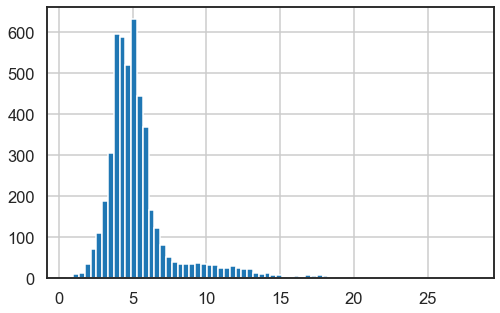

In [105]:
# Verteilung des Fahrzeugalters (in Jahren) im Datenset:
_= (bmw.period/365).hist(bins=70, figsize=(8,5))

Betrachten wir die kategoriellen Features noch etwas genauer: 

In [106]:
for i in ["model_key", "fuel", "paint_color", "car_type"]:
    print()
    print(f"Merkmal {i}, Anzahl der Ausprägungen {bmw[i].nunique()}:\n")
    print(bmw[i].value_counts())
    print("-"*80)


Merkmal model_key, Anzahl der Ausprägungen 75:

320                  752
520                  633
318                  569
X3                   438
116                  358
                    ... 
ActiveHybrid 5         1
M135                   1
M5                     1
635                    1
220 Active Tourer      1
Name: model_key, Length: 75, dtype: int64
--------------------------------------------------------------------------------

Merkmal fuel, Anzahl der Ausprägungen 4:

diesel           4641
petrol            191
hybrid_petrol       8
electro             3
Name: fuel, dtype: int64
--------------------------------------------------------------------------------

Merkmal paint_color, Anzahl der Ausprägungen 10:

black     1633
grey      1175
blue       710
white      538
brown      341
silver     329
red         52
beige       41
green       18
orange       6
Name: paint_color, dtype: int64
--------------------------------------------------------------------------------

M

Insbesondere bei den Modellvarianten (Feature 'model_key') gibt es sehr viele Ausprägungen.   
Lässt sich das "vereinfachen"?

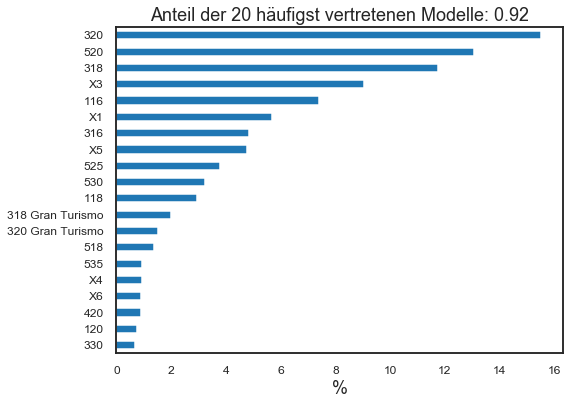

In [111]:
figsize(8,6)
_= bmw.model_key.value_counts(normalize=True)[:20].apply(lambda x: x*100).round(2).sort_values(ascending=True).plot(kind="barh", fontsize=12, title=titel)
titel = f"Anteil der 20 häufigst vertretenen Modelle: {bmw.model_key.value_counts(normalize=True)[:20].sum().round(2)}"
plt.xlabel("%"); plt.show()

Wir beschränken unser Modell auf diese 20 am häufigsten vorkommenden Modellreihen.  
Dafür erstellen wir ein zweites Datenset "bmwSmall" in dem nur noch diese Fahrzeugreihen enthalten sind.

In [112]:
t20_models = bmw.model_key.value_counts()[:20].index.to_list()  # Auslesen der T20 Modellbezeichnungen
bmwSmall = bmw.loc[bmw.model_key.isin(t20_models),:].copy()     # Neuer DataFrame bmwSmall mit Filterung auf die T20 Modelle
print(bmwSmall.shape)                                           # Umfang des neuen DataFrame
bmwSmall.model_key.value_counts()                               # In bmwSmall sind nur noch die T20 Modelle

(4460, 20)


320                 752
520                 633
318                 569
X3                  438
116                 358
X1                  275
316                 235
X5                  231
525                 184
530                 157
118                 143
318 Gran Turismo     97
320 Gran Turismo     73
518                  66
535                  46
X4                   46
X6                   44
420                  44
120                  36
330                  33
Name: model_key, dtype: int64

Und schauen uns die Verteilung der erzielten Auktionspreise je nach Modell an:

In [114]:
bmwSmall.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at', 'period', 'Sell_Month'],
      dtype='object')

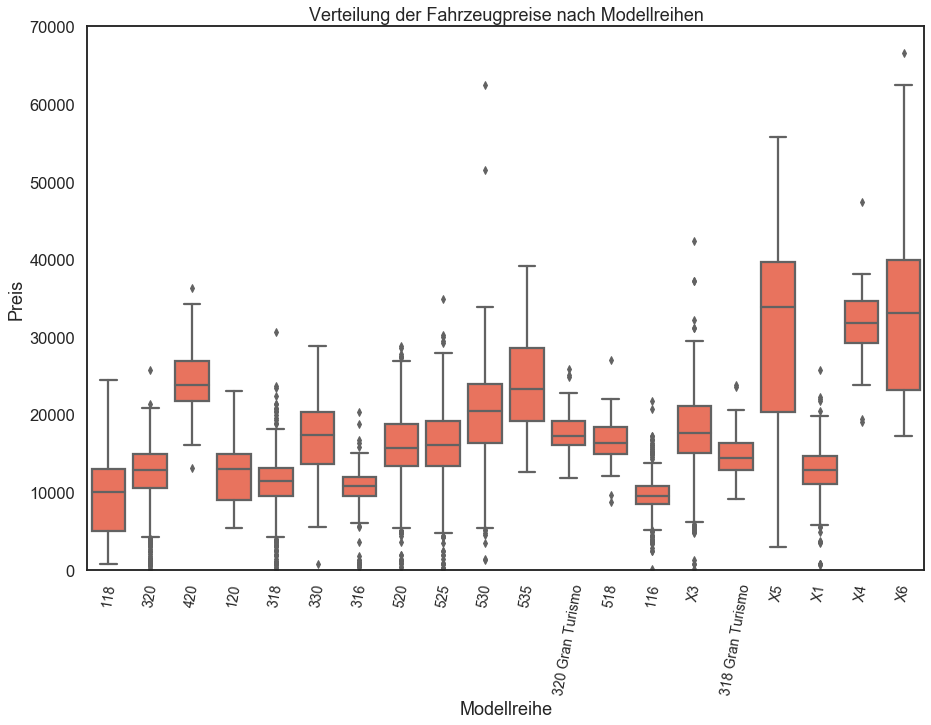

In [116]:
figsize(15,10)
x,y = bmwSmall.model_key, bmwSmall.price
_= sns.boxplot(x, y, data=bmwSmall, color="tomato") # violinplot
plt.title("Verteilung der Fahrzeugpreise nach Modellreihen")
plt.xticks(fontsize=14, rotation=80); plt.xlabel("Modellreihe"), plt.ylabel("Preis"); plt.ylim(0,70_000); plt.show()

In [118]:
bmwByModel = bmwSmall.groupby("model_key")
bmwByModel.price.describe()

,count,mean,std,min,25%,50%,75%,max
model_key,,,,,,,,
116,358.0,9653.910615,2754.608832,100.0,8525.0,9500.0,10800.0,21700.0
118,143.0,9647.552448,4291.866401,800.0,5050.0,10100.0,13000.0,24400.0
120,36.0,12416.666667,4370.125856,5400.0,8975.0,13050.0,14950.0,23000.0
316,235.0,10381.702128,3087.409862,400.0,9500.0,10800.0,12000.0,20300.0
318,569.0,10987.170475,3863.998774,100.0,9500.0,11400.0,13100.0,30600.0
318 Gran Turismo,97.0,14854.639175,2670.518856,9200.0,12900.0,14400.0,16400.0,23800.0
320,752.0,12161.702128,4292.640254,100.0,10575.0,12900.0,14900.0,25800.0
320 Gran Turismo,73.0,17745.205479,3030.540889,11900.0,16100.0,17300.0,19200.0,25900.0
330,33.0,16672.727273,6103.240570,800.0,13700.0,17400.0,20300.0,28900.0


In [121]:
SavePickle("bmwSmall", bmwSmall)

In [133]:
# Gepickelten DF einlesen
FILE = "bmwSmall"
open_df = open(FILE+'.pickle','rb')
data = pickle.load(open_df)
open_df.close()

In [134]:
bmwSmall = data.copy()
bmwSmall.shape

(4460, 20)

### 4.2 Lineare Regression

Jetzt bauen wir unsere Datenmatrix auf, auf der wir dann das Regressionsmodell trainieren wollen.  
Die Arbeitspakete:

    (1) Datenmatrix und Targetvektor aufbauen: Auswahl der Feature, die wir mit ins Modell nehmen möchten  
    (2) NA Werte bereinigen => Es gibt keine in diesem Datenset ... entfällt  
    (3) OH-Encoding für die kategoriellen Daten  
    (4) Standardisieren der numerischen Daten  
  
    (5) Trainingsset und Testset trennen  
    (6) Lineares Regressionsmodell traineren  
    (7) Regressionsmodell visualisieren  

##### (1) Datenmatrix & Targetvektor
Wir wählen wir aus, welche Features wir in das Modell "mitnehmen" möchten: 

In [135]:
features = ['model_key', 'mileage', 'engine_power','fuel', 'paint_color', 'car_type',
            'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
            'period', 'Sell_Month', ]

Mit dieser Auswahl erstellen wir eine Feature-Matrix X und einen Targetvektor y

In [136]:
bmwSmall.reset_index(inplace=True)   # Numerischen Index neu aufbauen (Lücken aus dem Filterprozess schließen!)
X = bmwSmall[features].copy()
y = bmwSmall.price.copy()
print(X.shape)
print(y.shape)

(4460, 16)
(4460,)


##### (3) & (4) OH-Encoding und Standardisieren

In [137]:
# Wir importieren die Preprocessing Tools aus Scikit-Learn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler   # Unsere Werkzeuge

# Wir legen ein paar Listen an, um das PreProcessing zu erleichtern
feat_cat = ["model_key", "fuel", "paint_color", "car_type", ] 
feat_num = ['mileage', 'engine_power', 'period',]
feat_bool = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6','feature_7', 'feature_8']
feat_other = ['Sell_Month']

# Jetzt vereinzeln wir die Matrix X in vier Teil-Matrizen 
Xcat = X[feat_cat] 
Xnum = X[feat_num]
Xbool = X[feat_bool]
Xother = X[feat_other]

# OH-Encoding auf der Matrix mit den kategoriellen Daten
oh = OneHotEncoder(sparse=False)
Xcat = oh.fit_transform(Xcat)
Xcat_cols = oh.get_feature_names(feat_cat)
Xcat = pd.DataFrame(data=Xcat, columns=Xcat_cols)

# # Alternativ: Label-Encoding auf der Matrix mit den kategoriellen Daten
# le = LabelEncoder()
# Xcat = Xcat.apply(le.fit_transform)
# Xcat = pd.DataFrame(data=Xcat, columns=feat_cat)

# Standardisieren auf der Matrix mit den numerischen Daten
# scaler = StandardScaler()
# Xnum = scaler.fit_transform(Xnum)
# Xnum = pd.DataFrame(Xnum, columns=feat_num)

# Zusammenführen der vier Teilmatrizen zu einer Datenmatrix X
X = pd.concat([Xcat, Xnum, Xbool, Xother], axis=1,  )

print(f"Featurematrix X mit {X.shape[0]} Datensätzen und {X.shape[1]} Feature/Variablen")
print(f"Targetvektor y mit {y.shape[0]} Datensätzen")

Featurematrix X mit 4460 Datensätzen und 53 Feature/Variablen
Targetvektor y mit 4460 Datensätzen


In [138]:
X.head(3)

,model_key_116,model_key_118,model_key_120,model_key_316,model_key_318,model_key_318 Gran Turismo,model_key_320,model_key_320 Gran Turismo,model_key_330,model_key_420,...,period,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,Sell_Month
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2161,True,True,False,False,True,True,True,False,1
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2132,False,False,False,False,True,False,True,False,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1311,True,True,False,False,True,True,True,True,2


##### (5) Trainings- & Testset splitten
Wir splitten in ein Trainingsset mit 70% fürs Training und 30% fürs Testen 

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

##### (6) Lineares Regressionsmodell trainieren 

In [141]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)  # Model instanziieren und auf die Trainingsdaten trainieren

scoreTrain = lr.score(X_train, y_train)        # Ermittelt R² Score für Trainingsdaten
scoreTest = lr.score(X_test, y_test)           # Ermittelt den R² für die Testdaten

print("-"*65)
print(f"Anteil der erklärbaren Varianz, R² auf dem Trainingsset = {scoreTrain:.2f}")
print(f"Anteil der erklärbaren Varianz, R² auf den TESTDATEN (!) = {scoreTest:.2f}")
print("-"*65)

-----------------------------------------------------------------
Anteil der erklärbaren Varianz, R² auf dem Trainingsset = 0.72
Anteil der erklärbaren Varianz, R² auf den TESTDATEN (!) = 0.70
-----------------------------------------------------------------


In [142]:
# Ausgabe der einzelnen Faktoren mit ihren Gewichten in der Regression:
weights = pd.Series(lr.coef_, index=X.columns.to_list(),)
weights.sort_values(ascending=False)

model_key_X6                  2.031707e+10
model_key_X5                  2.031707e+10
model_key_X4                  2.031707e+10
model_key_420                 2.031707e+10
model_key_535                 2.031707e+10
model_key_530                 2.031707e+10
model_key_520                 2.031707e+10
model_key_518                 2.031707e+10
model_key_525                 2.031707e+10
model_key_318 Gran Turismo    2.031706e+10
model_key_320 Gran Turismo    2.031706e+10
model_key_318                 2.031706e+10
model_key_320                 2.031706e+10
model_key_316                 2.031706e+10
model_key_X3                  2.031706e+10
model_key_330                 2.031706e+10
model_key_118                 2.031706e+10
model_key_116                 2.031706e+10
model_key_120                 2.031706e+10
model_key_X1                  2.031706e+10
fuel_hybrid_petrol            3.506103e+03
car_type_suv                  2.793800e+03
car_type_convertible          2.443278e+03
feature_6  

Mit unserem Modell können wir jetzt den Preis für "neue" ungesehene Daten schätzen:  
Zur Vereinfachung ziehen wir uns aus unseren "unberührten" Testdaten ein Sample und lassen es durch unser Modell schätzen:

In [146]:
Size = 5
Sample = X_test.sample(Size, random_state=111)
yreal = pd.Series(y_test[Sample.index])
ypred = pd.Series(lr.predict(Sample), index=Sample.index, name="price_pred").astype("int")
result = pd.concat([ypred,yreal,Sample], axis=1)
result.T

,3752,2268,80,3592,4382
price_pred,15023,18835,10852,11385,7454
price,13300,14400,10700,11900,6300
model_key_116,0,0,0,0,0
model_key_118,0,0,0,0,0
model_key_120,0,0,0,0,0
model_key_316,0,0,0,0,0
model_key_318,0,0,0,0,0
model_key_318 Gran Turismo,0,0,0,0,0
model_key_320,0,0,1,0,0
model_key_320 Gran Turismo,0,0,0,0,0


In [ ]:
results = pd.DataFrame( {"Estimator":[], "Accuracy":[], "Precision":[], "Recall":[], "f1":[], "AUC":[], "Duration":[]} )

In [165]:
results = pd.DataFrame({"AnzFeature":[], "Feature":[], "Score":[]})
results.loc[i,:] = [name, acc, prec, rec, f1, auc, duration]
results

IndexError: single positional indexer is out-of-bounds

In [175]:
results = pd.DataFrame({"AnzFeature":[], "Feature":[], "Score":[]})

for i in range(4,len(X_train.columns)):
    columns=X_train.columns.to_list()
    cs = []
    for _ in range(i): 
        c = max([(lr.fit(X_train[cs+[c]],y_train).score(X_test[cs+[c]],y_test),c) for c in columns])[1]
        columns.remove(c)
        cs.append(c)
    score = lr.score(X_test[cs],y_test).round(5)
    results.loc[i,:] = [int(i), cs, score]
        
#     print(cs)
#     score = lr.score(X_test[cs],y_test); score.round(5)

In [180]:
results = results.sort_values(by="Score", ascending=False)
results[:1]

,AnzFeature,Feature,Score
32,32.0,"[engine_power, period, mileage, model_key_X4, ...",0.70144


## 5 Supervised Learning: Classification

### 5.1 KAGGLE Competition - "Give Me Some Credit"
https://www.kaggle.com/c/GiveMeSomeCredit/data

Das schreiben die Autoren auf KAGGLE:

*Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted.  
This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.*

*The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.*

Hier eine kurze Beschreibung der einzelnen Variablen:

In [2]:
pd.set_option('display.max_colwidth', -1)
cs_info = pd.read_excel("cs-Data Dictionary.xls", header=1); cs_info

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquency or worse,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days past due but no worse in the last 2 years.,integer


In [7]:
# Datenset laden
cs = pd.read_csv("cs-training-small.csv")
cs = cs.iloc[:,1:]
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 11 columns):
RevolvingUtilizationOfUnsecuredLines    45000 non-null float64
age                                     45000 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    45000 non-null float64
DebtRatio                               45000 non-null float64
MonthlyIncome                           45000 non-null float64
NumberOfOpenCreditLinesAndLoans         45000 non-null float64
NumberOfTimes90DaysLate                 45000 non-null float64
NumberRealEstateLoansOrLines            45000 non-null float64
NumberOfTime60-89DaysPastDueNotWorse    45000 non-null float64
NumberOfDependents                      45000 non-null float64
SeriousDlqin2yrs                        45000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 3.8 MB


Jetzt werfen für mal einen Blick auf die Verteilung der Werte der einzelnen Variablen ...

In [8]:
cs.describe(percentiles=[.05,.25,.5,.75,.95], ).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
RevolvingUtilizationOfUnsecuredLines,45000.0,0.416316,6.662989,0.0,0.000000,0.030052,0.154618,0.554526,1.0,658.0
age,45000.0,52.203289,14.769210,21.0,29.000000,41.000000,52.000000,63.000000,78.0,96.0
NumberOfTime30-59DaysPastDueNotWorse,45000.0,0.248778,0.704626,0.0,0.000000,0.000000,0.000000,0.000000,2.0,12.0
DebtRatio,45000.0,301.823800,878.506793,0.0,0.004497,0.177000,0.366250,0.856588,2334.1,6466.0
MonthlyIncome,45000.0,6116.426533,4022.650588,0.0,1500.000000,3878.000000,5400.000000,7254.500000,13058.4,45000.0
NumberOfOpenCreditLinesAndLoans,45000.0,8.208067,4.620116,0.0,2.000000,5.000000,8.000000,11.000000,17.0,23.0
NumberOfTimes90DaysLate,45000.0,0.088733,0.473355,0.0,0.000000,0.000000,0.000000,0.000000,1.0,11.0
NumberRealEstateLoansOrLines,45000.0,0.967444,0.940120,0.0,0.000000,0.000000,1.000000,2.000000,3.0,4.0
NumberOfTime60-89DaysPastDueNotWorse,45000.0,0.064933,0.334411,0.0,0.000000,0.000000,0.000000,0.000000,0.0,11.0
NumberOfDependents,45000.0,0.701756,1.036654,0.0,0.000000,0.000000,0.000000,1.000000,3.0,4.0


Wir sehen an dieser kurzen Statistik bereits, dass in diesem Datenset furchbar große Ausreißer enthalten sind (siehe z.B. RUUL und DebtRation).  
Wir wissen nicht, ob diese "Ausreißer" wichtig sind für unser Modell ... oder ob es z.B. vernachlässigbare Eingabe-/Übertragungsfehler sind?  
Betrachten wir, wieviel Anteil diese speziellen Datensätze an unserer durch das Modell zu prognostizierenden Variable "SeriousDlqin2yrs" haben:

In [30]:
csRUUL_o1 = cs.loc[(cs.RevolvingUtilizationOfUnsecuredLines > 1.0),:]  # Auslesen der RUUL auffälligen Datensätze
csDebtRatio_o1 =  cs.loc[(cs.DebtRatio > 1.0),:]                       # Auslesen der DebtRatio auffälligen Datensätze
RUUL_Defaults = csRUUL_o1.SeriousDlqin2yrs.sum()                       # Anzahl der Defaults in den RUUL auffälligen Datensätzen
DebtR_Defaults = csDebtRatio_o1.SeriousDlqin2yrs.sum()                 # Anzahl der Defaults in den DebtRatio auffälligen Datensätzen

# Ausgabe der Berechnungen
print(f"Anzahl der 'Defaults' im gesamten Datenset {cs.SeriousDlqin2yrs.sum()}, entspricht {cs.SeriousDlqin2yrs.mean()}")
print("-"*100)
print(f"Anzahl der 'Auffälligen' RUULs Datensätze: {csRUUL_o1.shape[0]}")
print(f"Anzahl der 'Defaults' in den 'Auffälligen' RUULs Datensätzen {RUUL_Defaults} entspricht {RUUL_Defaults/csRUUL_o1.shape[0]}")
print("-"*100)
print(f"Anzahl der 'Auffälligen' DebtRatio Datensätze: {csDebtRatio_o1.shape[0]}")
print(f"Anzahl der 'Defaults' in den 'Auffälligen' DebtRatio Datensätzen {DebtR_Defaults} entspricht {DebtR_Defaults/csDebtRatio_o1.shape[0]}")

Anzahl der 'Defaults' im gesamten Datenset 3008, entspricht 0.06684444444444444
----------------------------------------------------------------------------------------------------
Anzahl der 'Auffälligen' RUULs Datensätze: 947
Anzahl der 'Defaults' in den 'Auffälligen' RUULs Datensätzen 382 entspricht 0.4033790918690602
----------------------------------------------------------------------------------------------------
Anzahl der 'Auffälligen' DebtRatio Datensätze: 10456
Anzahl der 'Defaults' in den 'Auffälligen' DebtRatio Datensätzen 690 entspricht 0.06599081866870696


Zumindest die RUULs liefern einen überdurchschnittlichen Erklärungsbeitrag für unser Modell.  
Wir nehmen die auffälligen Merkmale mit in unsere weiteren Überlegungen.  
Jetzt bauen wir unsere Datenmatrix X und unseren Targetvektor y.

In [104]:
X = cs.iloc[:,:-1].copy()
y = cs.iloc[:,-1]
print(X.shape,y.shape)
print(f"Anteil Defaults im gesamten Datenset {y.mean():.3f}")

(45000, 10) (45000,)
Anteil Defaults im gesamten Datenset 0.067


Wir splitten in ein Trainingsset (2/3) und ein Testset (1/3):

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33333, shuffle=True, stratify=y, random_state=123)
print(f' Trainingsset: {X_train.shape, y_train.shape} / Test Set: {X_test.shape, y_test.shape}')

 Trainingsset: ((30000, 10), (30000,)) / Test Set: ((15000, 10), (15000,))


### 5.2 Classification mit Decision Tree Model

In [111]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

model = 'Decision Tree'
t_names = ['Kein Default', 'Default']

estimator = DecisionTreeClassifier(class_weight="balanced", ) # max_depth=5
estimator.fit(X_train, y_train)

ytrue = y_test
ypred = estimator.predict(X_test)

accuracy = accuracy_score(ytrue, ypred)
roc_auc = roc_auc_score(ytrue, ypred)
print(f"Dummy-Baseline Accuracy: {1-y_test.mean()}")
print(f'Accuracy Score: {accuracy:.4f}, AUC: {roc_auc:.4f}')
print("\n",classification_report(ytrue, ypred, target_names=t_names))

# Feature Importance aus Model in Dataframe FI schreiben
fi_data = {'Feature': list(X_train.columns), 'F_Importance': estimator.feature_importances_}
FI = pd.DataFrame(data=fi_data)
FI = FI.sort_values('F_Importance', ascending=False); FI

# Confusion Matrix erstellen
mat = confusion_matrix(ytrue, ypred,)
print("Confusion Matrix:\n",mat)

Dummy-Baseline Accuracy: 0.9331333333333334
Accuracy Score: 0.8980, AUC: 0.5955

               precision    recall  f1-score   support

Kein Default       0.95      0.94      0.95     13997
     Default       0.24      0.25      0.24      1003

    accuracy                           0.90     15000
   macro avg       0.59      0.60      0.59     15000
weighted avg       0.90      0.90      0.90     15000

Confusion Matrix:
 [[13223   774]
 [  756   247]]


Mit ein paar Optimierungen können wir bereits moderate/gute Ergebnisse erzielen.
Nach diesen ersten "Gehversuchen" schicken wir ein paar weitere Modelle ins Rennen:

### 5.3 Classification mit verschiedenen Modellen

Beim Decision Tree Classifier ist es nicht notwendig die Daten zu standardisieren.  
Bei den Modellen, die wir jetzt zusätzlich ins Spiel bringen, könnte es sehr hilfreich sein.  
Wir behalten uns diesen Preprocessing-Schritt noch vor und probieren es zunächst ohne Standardisierung.

In [52]:
# # Standardisieren auf der Matrix mit den numerischen Daten
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

Wir bauen uns ein Pipeline aus verschiedenen Classifiern, die wir in einem "Durchgang" auf unsere Trainings- und Testdaten anwenden werden.  
Die einzelnen Schritte:

+ Importieren der notwendigen Classifier Alogrithmen u. verschd. Werkzeuge.
+ Instanziierung der einzelnen Algorithmen (so wird ein konkretes Learner-Objekt daraus).
+ Erstellen einer Pipeline (Festlegen, welche Modelle tatsächlich angewendet werden sollen).
+ Anlegen eines Dataframe, um die Ergebnisse der einzelnen Modelle abzuspeichern.
+ Pipeline-Logik: Ruft die vorab defierten Classifier auf u. wendet sie auf X_train u. X_test an.
+ Ausgeben der Ergebnisse aus unserem Dataframe

In [48]:
# Importieren der Classifier Algorithmen, die wir als Kandidaten verwenden möchten:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Importieren von Metriken und Zeitfunktionen
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report
import time

# Hier sind unsere Classifier Kandidaten Modelle
clf1 = GaussianNB()
clf2 = SVC(class_weight="balanced",)
clf3 = LogisticRegression(class_weight="balanced")
clf4 = KNeighborsClassifier()
# Dem Random Forest spendieren wir 3 Varianten ...
clf5 = RandomForestClassifier(class_weight="balanced", n_jobs=-1)
clf6 = RandomForestClassifier(n_estimators = 300, class_weight="balanced", max_depth=3,  bootstrap=True, n_jobs=-1)
clf7 = RandomForestClassifier(n_estimators = 500, class_weight="balanced", max_depth=5,  bootstrap=False, n_jobs=-1)

# Das ist unsere Pipeline die wir durchlaufen
pipeline = [(1, "NB",clf1),
           (2, "SVC", clf2),
           (3, "LogReg", clf3),
           (4, "Knn5", clf4),
           (5, "RF", clf5),
           (6, "RF opt1", clf6),
           (7, "RF opt2", clf7),
          ]  
# Wir speichern die "Rundenergebnisse" der einzelnen Classifier in einem Dataframe
results = pd.DataFrame( {"Estimator":[], "Accuracy":[], "Precision":[], "Recall":[], "f1":[], "AUC":[], "Duration":[]} )
models_fitted = []  # Ablegen der gefitteten Modelle (Objekte) in einer Liste

# Durchlauf mehrerer Modelle und Wegschreiben des Ergebnisses
for i, name, estimator in pipeline:
    
    # Model fitten u. in Liste ablegen
    start = time.time()                     # Stoppuhr: Zwischenzeit nehmen
    est = estimator.fit(X_train, y_train)   # model aus Listing nehmen und fitten
    models_fitted.append(est)

    # Scorings erstellen
    ytrue = y_test                          # ...
    ypred = est.predict(X_test)             # model auf Testdaten anwenden (predict)
    
    acc = accuracy_score(ytrue, ypred )     # Accuracy 
    prec = precision_score(ytrue, ypred )   # Precision 
    rec = recall_score(ytrue, ypred,  )     # Recall
    f1 = f1_score(ytrue, ypred, )           # f1-Score
    auc = roc_auc_score(ytrue, ypred, )     # AUC
    end = time.time()                       # Stoppuhr: Zwischenzeit nehmen
    duration = end - start                  # Walltime in Variable abspeichern
    
    results.loc[i,:] = [name, acc, prec, rec, f1, auc, duration]
    
print(f"Dummy-Baseline Accuracy: {1-y_test.mean()}")
results.round(3)

Baseline Accuracy: 0.9331333333333334


,Estimator,Accuracy,Precision,Recall,f1,AUC,Duration
1,NB,0.902,0.344,0.519,0.414,0.724,0.047
2,SVC,0.823,0.229,0.696,0.344,0.764,34.728
3,LogReg,0.854,0.256,0.621,0.363,0.746,0.155
4,Knn5,0.931,0.456,0.196,0.275,0.590,8.616
5,RF,0.932,0.474,0.099,0.163,0.545,0.452
6,RF opt1,0.790,0.208,0.764,0.327,0.778,1.900
7,RF opt2,0.802,0.217,0.752,0.337,0.779,6.739
8,SVC opt1,0.829,0.230,0.666,0.342,0.753,40.929


In [43]:
results_not_normalized.round(3)

,Estimator,Accuracy,Precision,Recall,f1,AUC,Duration
1,NB,0.902,0.346,0.516,0.415,0.723,0.059
2,SVC,0.912,0.083,0.031,0.045,0.503,275.888
3,LogR,0.852,0.256,0.631,0.364,0.750,0.313
4,Knn5,0.932,0.319,0.015,0.029,0.506,0.763
5,RF,0.930,0.419,0.119,0.185,0.553,0.353
6,RF opt1,0.774,0.196,0.770,0.313,0.772,1.990
7,RF opt2,0.791,0.209,0.765,0.328,0.779,5.693


In [40]:
results_not_normalized = results.copy()

## Exkurs: Textmining

# Parkplatz

In [120]:
def SavePickle(name, object):
    import pickle
    save_df = open(str(name)+'.pickle','wb')
    pickle.dump(object,save_df)
    save_df.close()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test_total, y_train, y_test_total = train_test_split(X, y, test_size=0.4, shuffle=True, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_total, y_test_total, test_size=0.5, shuffle=True, stratify=y_test_total, random_state=42)
print(f' Trainingsset: {X_train.shape, y_train.shape} / Validation Set: {X_val.shape, y_val.shape}  / Test Set: {X_test.shape, y_test.shape}')

In [77]:
# Confusion Matix plotten
def Plot_confMatrix(y_real, y_pred, title='Titel'):
    '''
    Erstellen einer Confusion Matrix Grafik
    im Abgleich von Label y_real und Prognose y_pred
    '''
    from sklearn.metrics import confusion_matrix
    mat = confusion_matrix(y_real, y_pred)
    # sns.set(font_scale=1.4)
    sns.heatmap(mat, square=True, annot=True,  cmap='Blues', cbar=False, ) #, fmt='d'
    plt.xlabel('Prediction')
    plt.ylabel('True value')
    plt.title(title);
    return plt.show()   